<a href="https://colab.research.google.com/github/PosgradoMNA/Atividades-de-aprendizaje-SamaraGarcia/blob/main/Assigment07/Assigment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Módulo 4: Data Analysis with Python**

---



*   Ciencia y analítica de datos
*   Fecha de entrega: 1 de Noviembre del 2022
*   Alumna: Samara García González 
*   No.Cuenta: A01273001











In [2]:
#Módulo 4
#Learning objectives: 
#Summarize main characteristics of the data - gain better understanding of the dataset,
#Uncover relationships between different variables, and
#Extract important variables for the problem we are trying to solve.

In [3]:
#Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Download dataset 
import requests
filename = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
myfile = requests.get(filename)
open('downloads', 'wb').write(myfile.content)

35648

In [5]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
#Descargando librerias para regresión lineal
from sklearn.linear_model import LinearRegression

In [7]:
#Creando un objeto de regresión lineal 
lm = LinearRegression()
lm

LinearRegression()

In [8]:
#Prediciendo el precio 
X = df[['highway-mpg']]
Y = df['price']

In [9]:
#Haciendo fit para X y Y
lm.fit(X,Y)

LinearRegression()

In [10]:
#Mostando una predicción
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
#Mostrando el valor de intercept a
lm.intercept_

38423.3058581574

In [12]:
#Question 1 Escribe un objeto llamado lm1 para la regresión lineal 
lm1 = LinearRegression()
lm1

LinearRegression()

In [13]:
#Question 2 Entrena el modelo usando engine-size como variable independiente u price como variable dependiente
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [14]:
#Question 3 Find the slope and intercept of the model.
lm1.coef_


array([[166.86001569]])

In [15]:
lm1.intercept_

array([-7963.33890628])

In [16]:
#Question 4 Muestra la ecuación para la predicción
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

**Multiple linear regression**

---



In [17]:
#Predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
#Haciendo fit en el modelo lineal
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
#Intercept
lm.intercept_

-15806.62462632922

In [20]:
#Coeficientes
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [21]:
#Question 5 Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [22]:
#Question 6 Encuentra el coeficiente dle modelo
lm2.coef_

array([   1.49789586, -820.45434016])

**Model Evaluation Using Visualization**

---



In [23]:
#Importando librerias
import seaborn as sns
%matplotlib inline 

(0.0, 48155.94286220754)

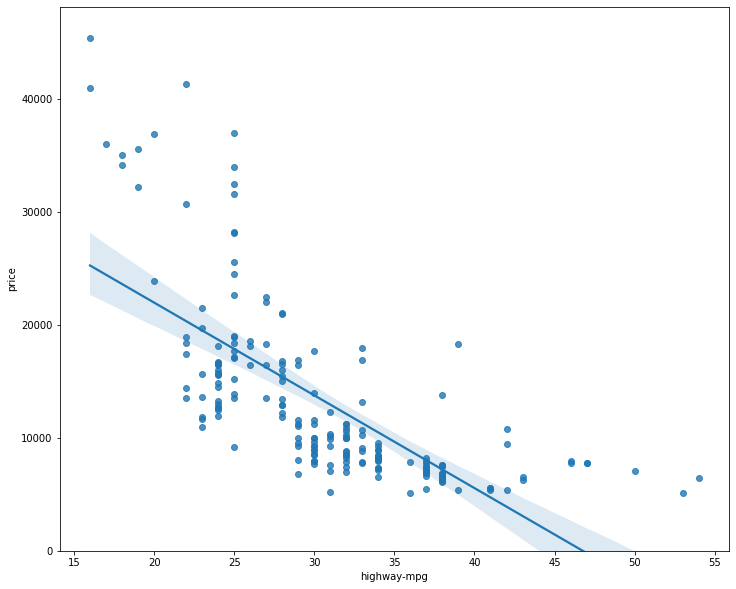

In [24]:
#Highway-mpg
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

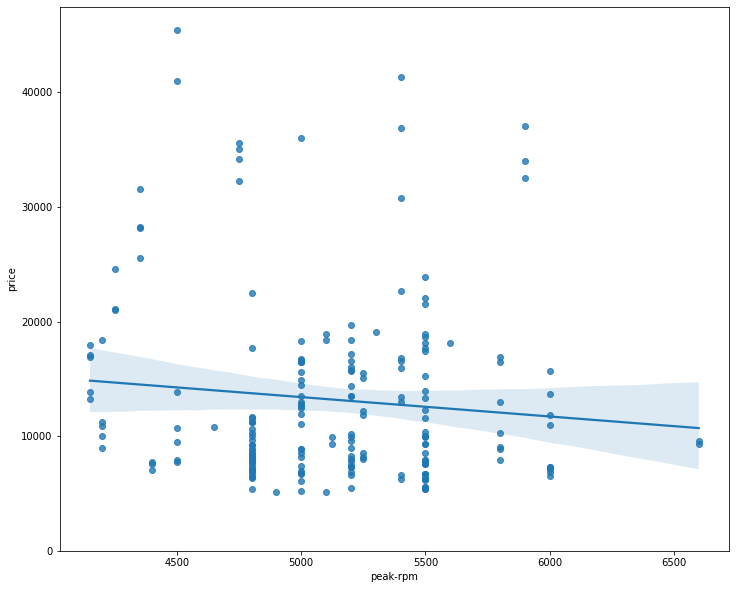

In [25]:
#Comparando regression lineal con peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [26]:
#Question 7
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


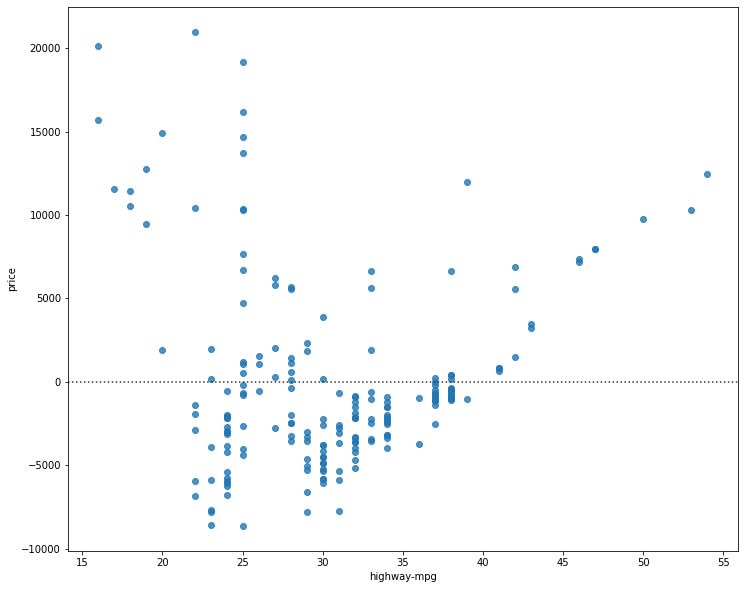

In [27]:
#Residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


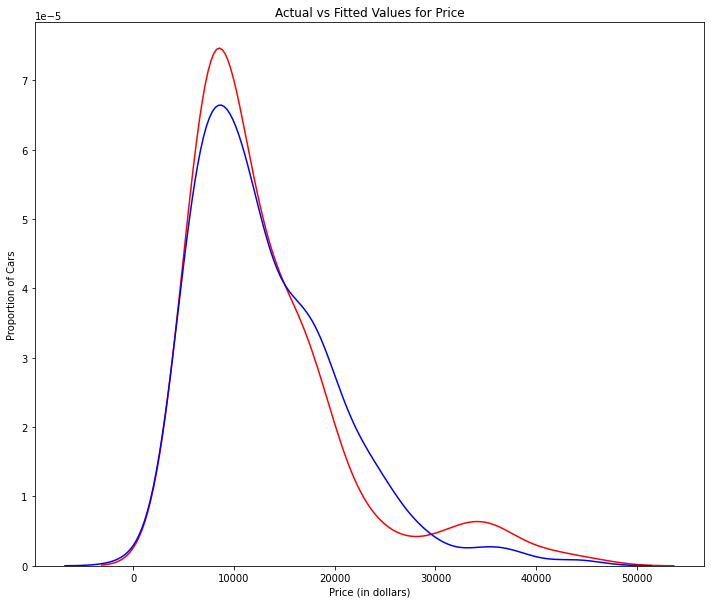

In [29]:
#Realizando una predicción multiple lineal 
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

** Polynomial Regression and Pipelines**

---



In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
#Obteniendo las variables
x = df['highway-mpg']
y = df['price']

In [32]:
#Usando un polinomio de grado 3 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


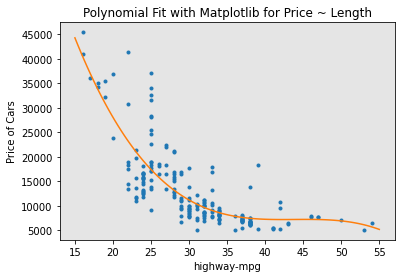

In [33]:
#Graficando la función
PlotPolly(p, x, y, 'highway-mpg')

In [34]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


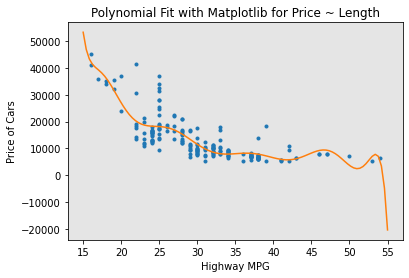

In [35]:
#Question 8 Crea un polinomio de orden 11 con las variables x y y
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
#Polinomio de grado 2 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [38]:
Z_pr=pr.fit_transform(Z)

In [40]:
#Datos originales
Z.shape

(201, 4)

In [41]:
#Datos depués de la transformación
Z_pr.shape

(201, 15)

**Pipeline**

---



In [42]:
#Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
#Creando el pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [45]:
#Pasamos list como argumento al pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
#Haciendo fit 
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
#Question 9 Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [48]:
#Modelo 1: Simple linear Regression
lm.fit(X, Y)
# Encontrando R^2
print('The R2 es: ', lm.score(X, Y))

The R2 es:  0.4965911884339176


In [49]:
#Calculando yhat predicción
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [50]:
#Importando librerias para MSE:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [52]:
#Calculando r2 
#Fit 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [53]:
#Calculando MSE
Y_predict_multifit = lm.predict(Z)
print('MSE using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

MSE using multifit is:  11980366.87072649


**Polynomial Fit**

---



In [54]:
#Importando las librerias
from sklearn.metrics import r2_score

In [55]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [56]:
#MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

**Prediction and Decision Making**

---



In [57]:
#Importando librerias 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [58]:
#Creando un nuevo input 
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [59]:
#Haciendo fit
lm.fit(X, Y)
lm

LinearRegression()

In [60]:
#Haciendo la predicción 
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

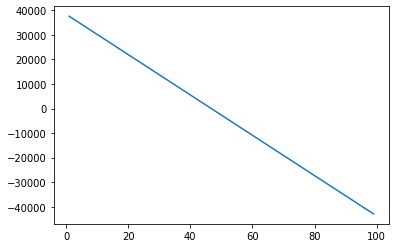

In [61]:
plt.plot(new_input, yhat)
plt.show()